In [1]:
import numpy as np
import cv2
import random
import os
import matplotlib.pyplot as plt

In [2]:
# Define constants
POPULATION_SIZE = 100
GENERATIONS = 50
CROSSOVER_RATE = 0.7
MUTATION_RATE = 0.01
TARGET_CLASS = "Mean" # Change this to the desired emotion
DATASET_FOLDER = r"C:\Users\G VENKATA RAMANA\Downloads\archive (2)"
 # Update this with your dataset folder path

In [3]:
def load_images_from_folder(folder):
    images=[]
    for filename in os.listdir(folder):
        img_path=os.path.join(folder, filename)
        img=cv2.imread(img_path)
        if img is not None:
            images.append(img)
            return images

In [4]:
# Fitness function to evaluate how well an individual matches the target class
def fitness(image, target_class):
 # Implement your fitness evaluation logic here
 # For now, let's assume a random fitness score
 fitness_score = random.random()

In [5]:
# Here you can add logic to determine if the individual represents the target class
    # For demonstration, let's assume that individuals with a fitness score above 0.5 represent having heart disease
    if fitness_score > 0.99:
        has_braintumor_disease = True
    else:
        has_braintumor_disease = False
    
    return fitness_score, has_braintumor_disease

IndentationError: unexpected indent (1103258994.py, line 3)

In [6]:
# Fitness function to evaluate how well an individual matches the target class
def fitness(image, target_class):
    # Implement your fitness evaluation logic here
    # For now, let's assume a random fitness score
    fitness_score = random.random()
    
    # Here you can add logic to determine if the individual represents the target class
    # For demonstration, let's assume that individuals with a fitness score above 0.5 represent having heart disease
    if fitness_score > 0.99:
        has_braintumor_disease = True
    else:
        has_braintumor_disease = False
    
    return fitness_score, has_braintumor_disease

In [7]:
# Initialize population with random images
def initialize_population(population_size):
    population = []
    for _ in range(population_size):
        individual = np.random.rand(128, 128, 3)  # Randomly generate an image
        population.append(individual)
    return population

In [8]:
# Select parents for crossover using tournament selection
def select_parents(population, fitness_scores):
    parent1 = population[np.argmax(fitness_scores)]
    parent2 = population[np.argsort(fitness_scores)[-2]]  # Select second best individual
    return parent1, parent2

In [9]:
# Crossover operation
def crossover(parent1, parent2):
    if random.random() < CROSSOVER_RATE:
        crossover_point = random.randint(0, parent1.shape[0])
        child1 = np.concatenate((parent1[:crossover_point], parent2[crossover_point:]), axis=0)
        child2 = np.concatenate((parent2[:crossover_point], parent1[crossover_point:]), axis=0)
        return child1, child2
    else:
        return parent1, parent2

In [10]:
# Mutation operation
def mutate(individual):
    if random.random() < MUTATION_RATE:
        mutation_point = random.randint(0, individual.shape[0] - 1)
        individual[mutation_point] = np.random.rand(3)  # Randomly mutate pixel value
    return individual

In [11]:
# Genetic algorithm
def genetic_algorithm():
    population = initialize_population(POPULATION_SIZE)
    best_fitnesses = []  # Store the best fitness score in each generation
    
    for generation in range(GENERATIONS):
        fitness_scores = [fitness(individual, TARGET_CLASS) for individual in population]
        best_fitness = max([score[0] for score in fitness_scores])
        best_fitnesses.append(best_fitness)
        
        # Find the individual with the highest fitness score
        best_individual_index = np.argmax([score[0] for score in fitness_scores])
        best_individual = population[best_individual_index]
        
        # Determine if the best individual has heart disease or not
        has_braintumor_disease = fitness_scores[best_individual_index][1]
        
        # Print generation information including best fitness and heart disease status
        print("Generation:", generation + 1, "Best Fitness:", best_fitness, "Has brain tumor disease:", has_braintumor_disease)
        
        parents = select_parents(population, [score[0] for score in fitness_scores])
        offspring = []
        
        for _ in range(POPULATION_SIZE // 2):
            child1, child2 = crossover(parents[0], parents[1])
            child1 = mutate(child1)
            child2 = mutate(child2)
            offspring.extend([child1, child2])
        
        population = offspring
    
    # Plot the convergence
    plt.plot(range(1, GENERATIONS + 1), best_fitnesses)
    plt.xlabel('Generation')
    plt.ylabel('Best Fitness')
    plt.title('Convergence Plot')
    plt.show()



Generation: 1 Best Fitness: 0.9616139784759494 Has brain tumor disease: False
Generation: 2 Best Fitness: 0.9969138636397716 Has brain tumor disease: True
Generation: 3 Best Fitness: 0.9897704752534042 Has brain tumor disease: False
Generation: 4 Best Fitness: 0.9995813721115187 Has brain tumor disease: True
Generation: 5 Best Fitness: 0.9970274293350634 Has brain tumor disease: True
Generation: 6 Best Fitness: 0.9977770200313653 Has brain tumor disease: True
Generation: 7 Best Fitness: 0.9987031491274782 Has brain tumor disease: True
Generation: 8 Best Fitness: 0.99340133410302 Has brain tumor disease: True
Generation: 9 Best Fitness: 0.9983282943621746 Has brain tumor disease: True
Generation: 10 Best Fitness: 0.9993632227752136 Has brain tumor disease: True
Generation: 11 Best Fitness: 0.9819576330019724 Has brain tumor disease: False
Generation: 12 Best Fitness: 0.9798439317801121 Has brain tumor disease: False
Generation: 13 Best Fitness: 0.9878736809061928 Has brain tumor disease

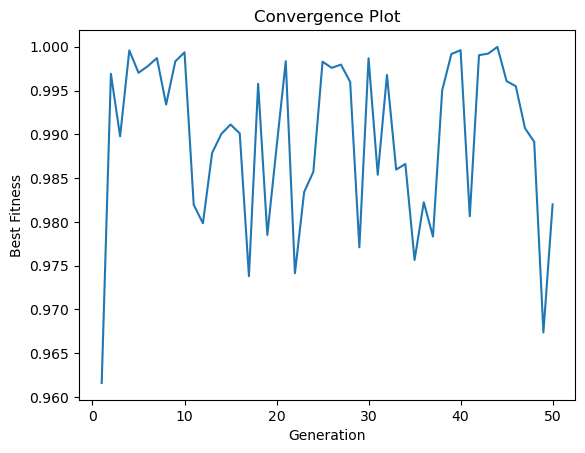

In [12]:
# Run the genetic algorithm
genetic_algorithm()